# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:
pip install gdown

In [ ]:
!gdown --id 1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM

Downloading...
From: https://drive.google.com/uc?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM
To: /content/documents.rar
19.0MB [00:00, 52.1MB/s]


In [ ]:
!gdown --id 1ZIR9symHyFeJr7zizEdW9RauHBWiHfbQ

Downloading...
From: https://drive.google.com/uc?id=1ZIR9symHyFeJr7zizEdW9RauHBWiHfbQ
To: /content/glove_vectors
128MB [00:02, 47.7MB/s]


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!pip install unrar

In [ ]:
!unrar x '/content/documents'

Streaming output truncated to the last 5000 lines.
Extracting  documents/sci.space_60893.txt                                 66%  OK 
Extracting  documents/sci.space_60894.txt                                 66%  OK 
Extracting  documents/sci.space_60895.txt                                 66%  OK 
Extracting  documents/sci.space_60896.txt                                 66%  OK 
Extracting  documents/sci.space_60897.txt                                 66%  OK 
Extracting  documents/sci.space_60898.txt                                 66%  OK 
Extracting  documents/sci.space_60899.txt                                 66%  OK 
Extracting  documents/sci.space_60900.txt                                 66%  OK 
Extracting  documents/sci.space_60901.txt                                 66%  OK 
Extracting  documents/sci.space_60902.txt                                 66%  OK 
Extracting  documents/sci.spa

In [1]:
import tensorflow as tf
#import openCV
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

In [ ]:
dir_path = os.path.join(os.getcwd(),'documents')

In [ ]:
### create a dataframe to store the locationa nd it's class
class_df = pd.DataFrame(columns=['path','class','prcsd_mail','prcsd_subject','prcsd_text'])

In [ ]:
def extract_class_filepath(dir_path):
  path_file = []
  path_class = []
  file_path = os.listdir(dir_path)
  file_path.sort()
  for _file in file_path:
    path_file.append(os.path.join(dir_path,_file))
    path_class.append(_file.split('_')[0])
    
  return path_file, path_class

In [ ]:
path_file, path_class = extract_class_filepath(dir_path)
class_df['path'] = path_file
class_df['class'] = path_class

In [ ]:
class_df.head()

,path,class,prcsd_mail,prcsd_subject,prcsd_text
0,/content/documents/alt.atheism_49960.txt,alt.atheism,NaN,NaN,NaN
1,/content/documents/alt.atheism_51060.txt,alt.atheism,NaN,NaN,NaN
2,/content/documents/alt.atheism_51119.txt,alt.atheism,NaN,NaN,NaN
3,/content/documents/alt.atheism_51120.txt,alt.atheism,NaN,NaN,NaN
4,/content/documents/alt.atheism_51121.txt,alt.atheism,NaN,NaN,NaN


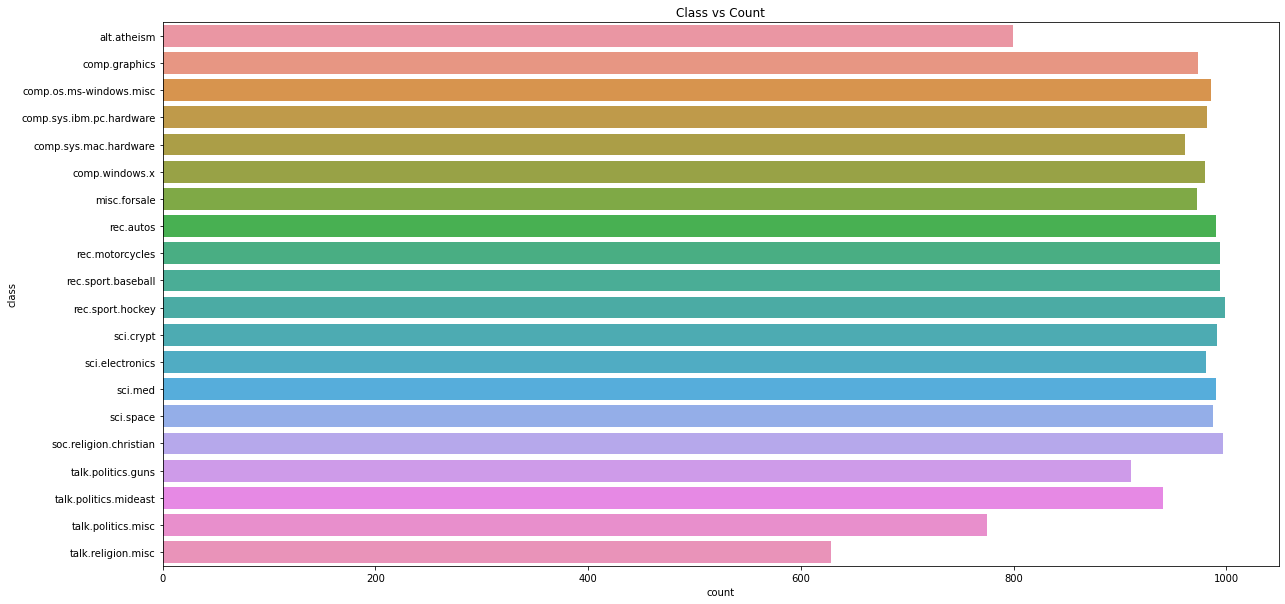

In [ ]:
### count plot of all the class labels.
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Class vs Count")
sns.countplot(y = class_df['class'])

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

In [ ]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def chunk_process(sent):
    chunks = ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)))
    for chunk in chunks:
        if type(chunk) == Tree:
            if hasattr(chunk, 'label'):
                if chunk.label() == 'PERSON':
                    current_chunk = (" ".join([token for token, pos in chunk.leaves()]))
                    sent = re.sub(current_chunk,'',sent)
                else:
                    replaced_chunk = ("_".join([token for token, pos in chunk.leaves()]))
                    current_chunk = (" ".join([token for token, pos in chunk.leaves()]))
                    sent = re.sub(current_chunk,replaced_chunk,sent)
    return sent

In [ ]:
import re
def remove_underscore(sent):
    merge_word = []
    for word in sent.split(' '):
        if re.search('_', word):
            search_flag = True
            word_list = []
            for w in word.split('_'):
                if len(w) <= 2:
                    continue
                else:
                    word_list.append(w)
            word = '_'.join(word_list)
        merge_word.append(word)
    return(' '.join(merge_word))

In [ ]:
regex = re.compile(("([a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`"
                    "{|}~-]+)*(@)(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?(\.|"
                    "\sdot\s))+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?)"))
match = re.compile("subject:.*")
match_write = re.compile("write to:.*")
match_from  = re.compile("from:.*")
tag_del     = re.compile(".*?\(<.*?>\)")
bracket_del = re.compile(".*?\((.*?)\)")

def preprocess_input_file(filename):
    domain = []
    sub_line = []
    sent_line = []
    with open(filename,encoding="utf8", errors='ignore') as f:
        for line in f:
            line = line.lower()
            email = re.findall(regex, line)
            ## get the domain of the mail
            if len(email) > 0:
                for mail in email:
                    for d in mail[0].split('@')[1].split('.'):
                        if d != 'com' and len(d)>2:
                            domain.append(d)
            ## replace the mail string with spaces
            line = re.sub(regex,'',line)
            ## get the subject line from the paragraph
            subject = re.findall(match,line)
            if len(subject) > 0:
                for sub in subject:
                    sub_line.append(sub.split(':',1)[1])              
            ## replace the mail string with spaces
            line = re.sub(match,'',line)
            ## replace the sentence starts with "Write to:" or "From:"
            line = re.sub(match_write,'',line)
            line = re.sub(match_from,'',line)
            ## Delete all the tags like "< anyword >"
            line = re.sub(tag_del,'',line)
            ## Delete all the data which are present in the brackets.
            line = re.sub(bracket_del,'',line)
            ## Remove all the words which ends with ":".
            line = ' '.join(i for i in line.split(' ') if not i.endswith(':'))
            ### Remove all the newlines('\n'), tabs('\t'), "-", "\".
            line = re.sub(r"[\n\t\-\+\>]*", "", line)
            ## decontract phrases
            line = decontracted(line)
            ## remove the _ from these type of words
            line = remove_underscore(line)
            ### keep only alphabets
            line = re.sub('[^a-zA-Z\s]+', ' ', line)
            line = chunk_process(line)
            # remove additional space from string  
            line = re.sub(' +', ' ', line) 
            if line == '' or line == ' ':
                continue
            else:
                sent_line.append(line)

    domain = ' '.join(domain)
    sub_line = ' '.join(sub_line)
    sent_line = ' '.join(sent_line)
    
    return domain, sub_line, sent_line

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import time
starttime = time.time()
filename = class_df['path'].iloc[0]
domain, sub_line, sent_line = preprocess_input_file(filename)
print("Time taken to process one file {}".format(time.time()-starttime))
print(domain)

Time taken to process one file 0.6205437183380127
mantis netcom mantis


In [ ]:
sub_line

' alt.atheism faq: atheist resources'

In [ ]:
sent_line

'atheism resources resources  december   atheist resources  addresses of atheist organizations  usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation in the us  evolution designs evolution designs sell the darwin fish it is a fish symbol like the ones christians stick on their cars but with feet and the word darwin written inside the deluxe moulded d plastic fish is postpaid in the us   ca  people in the san francisco bay area can get darwin fish from lynn gold  try mailing for net people who go to lynn directly the price is per fish  american atheist press aap publish various atheist books critiques of the bible lists of biblical contradictions and so on one such book is   the bible handbook by w p ball and g w foote american atheist press   pp isbn nd edition bible contradictions  absurdities atrocities immoralities contains ball the bible contradicts itself aap based on the ki

In [ ]:
from tqdm import tqdm_notebook
prep_domain = []
prep_sub = []
prep_sent = []
count = 0
for filepath in tqdm_notebook(class_df['path']):
  domain, sub_line, sent_line = preprocess_input_file(filepath)
  prep_domain.append(domain)
  prep_sub.append(sub_line)
  prep_sent.append(sent_line)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
class_df['prcsd_mail'] = prep_domain
class_df['prcsd_subject'] = prep_sub
class_df['prcsd_text'] = prep_sent

In [ ]:
class_df.head(5)

,path,class,prcsd_mail,prcsd_subject,prcsd_text
0,/content/documents/alt.atheism_49960.txt,alt.atheism,mantis netcom mantis,alt.atheism faq: atheist resources,atheism resources resources december atheis...
1,/content/documents/alt.atheism_51060.txt,alt.atheism,mantis mantis mantis,alt.atheism faq: introduction to atheism,atheism introduction introduction april begi...
2,/content/documents/alt.atheism_51119.txt,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,re: gospel dating,in article writes well john has a quite dif...
3,/content/documents/alt.atheism_51120.txt,alt.atheism,mantis kepler unh edu,re: university violating separation of church...,writes recently ras have been ordered and n...
4,/content/documents/alt.atheism_51121.txt,alt.atheism,watson ibm harder ccr-p ida org harder ccr-p i...,"re: [soc.motss, et al.] ""princeton axes match...",writes however i hate economic terrorism an...


In [ ]:
class_df.to_csv('preprocessed_file.csv')

In [2]:
class_df = pd.read_csv('preprocessed_file.csv')

In [3]:
class_df['merged_col'] = class_df[['prcsd_text','prcsd_subject','prcsd_mail']].apply(lambda x: ' '.join(x.astype(str)),axis=1)

In [4]:
class_df.head()

,Unnamed: 0,path,class,prcsd_mail,prcsd_subject,prcsd_text,merged_col
0,0,/content/documents/alt.atheism_49960.txt,alt.atheism,mantis netcom mantis,alt.atheism faq: atheist resources,atheism resources resources december atheis...,atheism resources resources december atheis...
1,1,/content/documents/alt.atheism_51060.txt,alt.atheism,mantis mantis mantis,alt.atheism faq: introduction to atheism,atheism introduction introduction april begi...,atheism introduction introduction april begi...
2,2,/content/documents/alt.atheism_51119.txt,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,re: gospel dating,in article writes well john has a quite dif...,in article writes well john has a quite dif...
3,3,/content/documents/alt.atheism_51120.txt,alt.atheism,mantis kepler unh edu,re: university violating separation of church...,writes recently ras have been ordered and n...,writes recently ras have been ordered and n...
4,4,/content/documents/alt.atheism_51121.txt,alt.atheism,watson ibm harder ccr-p ida org harder ccr-p i...,"re: [soc.motss, et al.] ""princeton axes match...",writes however i hate economic terrorism an...,writes however i hate economic terrorism an...


### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [5]:
#split the data into train and test data(25%) with Stratify sampling, random state 33,
from sklearn.model_selection import train_test_split
X = class_df['merged_col']
y = class_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33, stratify=y)

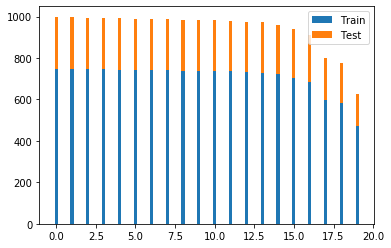

In [6]:
#plot bar graphs of y_train and y_test
#plot the histogram of the duration for train
import matplotlib.pyplot as plt
import datetime
import numpy as np
x= np.arange(20)
train_cnt = [cnt for cnt in y_train.value_counts()]
test_cnt = [cnt for cnt in y_test.value_counts()]
width = 0.2
p1 = plt.bar(x, train_cnt, width)
p2 = plt.bar(x, test_cnt, width,bottom=train_cnt)
#plt.yticks(np.arange(0, 100000, 10000))
plt.legend((p1[0], p2[0]), ('Train', 'Test'))

In [7]:
### https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.tolist())
text_seq_train = tokenizer.texts_to_sequences(X_train)
text_seq_test = tokenizer.texts_to_sequences(X_test)

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_text_train = pad_sequences(text_seq_train,maxlen=300,padding='post', truncating='post')
padded_text_test = pad_sequences(text_seq_test, maxlen=300,padding='post', truncating='post')

In [9]:
padded_text_train.shape

(14121, 300)

In [10]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

100665

In [11]:
## create a key value pair for each classes
temp = {}
rank_cnt = 0
for x in y_train.unique():
  temp[x] = rank_cnt
  rank_cnt+=1
temp

{'rec.sport.baseball': 0,
 'talk.politics.guns': 1,
 'talk.religion.misc': 2,
 'rec.sport.hockey': 3,
 'sci.electronics': 4,
 'soc.religion.christian': 5,
 'rec.autos': 6,
 'misc.forsale': 7,
 'sci.crypt': 8,
 'comp.windows.x': 9,
 'talk.politics.mideast': 10,
 'comp.sys.ibm.pc.hardware': 11,
 'talk.politics.misc': 12,
 'rec.motorcycles': 13,
 'sci.space': 14,
 'comp.graphics': 15,
 'sci.med': 16,
 'alt.atheism': 17,
 'comp.sys.mac.hardware': 18,
 'comp.os.ms-windows.misc': 19}

In [12]:
y_train = y_train.map(temp)
y_test = y_test.map(temp)

In [13]:
y_train

8815      0
16233     1
18615     2
15575     1
10102     3
         ..
13009    16
10977     8
5624      9
13975    14
799      15
Name: class, Length: 14121, dtype: int64

In [14]:
from tensorflow.keras.utils import to_categorical
#converting class labels to class lable categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(14121, 20)

In [16]:
import pickle
glove_vector_saved = open("glove_vectors","rb")
glove_words = pickle.load(glove_vector_saved)

In [17]:
embedding_mat = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vec = glove_words.get(word)
  if embedding_vec is not None:
    embedding_mat[i] = embedding_vec
print(embedding_mat.shape)

(100665, 300)


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.utils import compute_class_weight
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Flatten, LSTM, Dense, concatenate, Dropout,BatchNormalization,SpatialDropout1D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import roc_auc_score
from tensorflow.keras import regularizers
from tensorflow.python.keras.callbacks import TensorBoard,ModelCheckpoint
from sklearn.preprocessing import Normalizer
import pickle
import warnings

In [19]:
from sklearn.metrics import f1_score
def metrics_f1(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred,average='micro')
def calc_f1_score(y_true, y_pred):
    return tf.compat.v1.py_func(metrics_f1, (y_true, y_pred), tf.double)

In [21]:
# define the model
inputs = Input(shape=(300,))
embedding1 = Embedding(vocab_size, 300)(inputs)
conv1 = Conv1D(filters=16, kernel_size=3, activation='relu')(embedding1)
conv2 = Conv1D(filters=16, kernel_size=5, activation='relu')(embedding1)
conv3 = Conv1D(filters=16, kernel_size=7, activation='relu')(embedding1)
# merge
merged = concatenate([conv1, conv2, conv3],axis=1)
merged = Dropout(0.6)(merged)
## pooling
pool1 = MaxPooling1D(pool_size=2,strides=1)(merged)
conv4 = Conv1D(filters=16, kernel_size=3, activation='relu')(pool1)
conv5 = Conv1D(filters=16, kernel_size=5, activation='relu')(pool1)
conv6 = Conv1D(filters=16, kernel_size=7, activation='relu')(pool1)
## merge
merged = concatenate([conv4, conv5, conv6],axis=1)
merged = Dropout(0.6)(merged)
## pooling
pool2 = MaxPooling1D(pool_size=2,strides=1)(merged)
conv7 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool2)
# interpretation
x = Flatten()(conv7)
x = Dropout(0.7)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.7)(x)
outputs = Dense(20, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[calc_f1_score])
# summarize
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     30199500    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 298, 16)      14416       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 296, 16)      24016       embedding[0][0]                  
______________________________________________________________________________________________

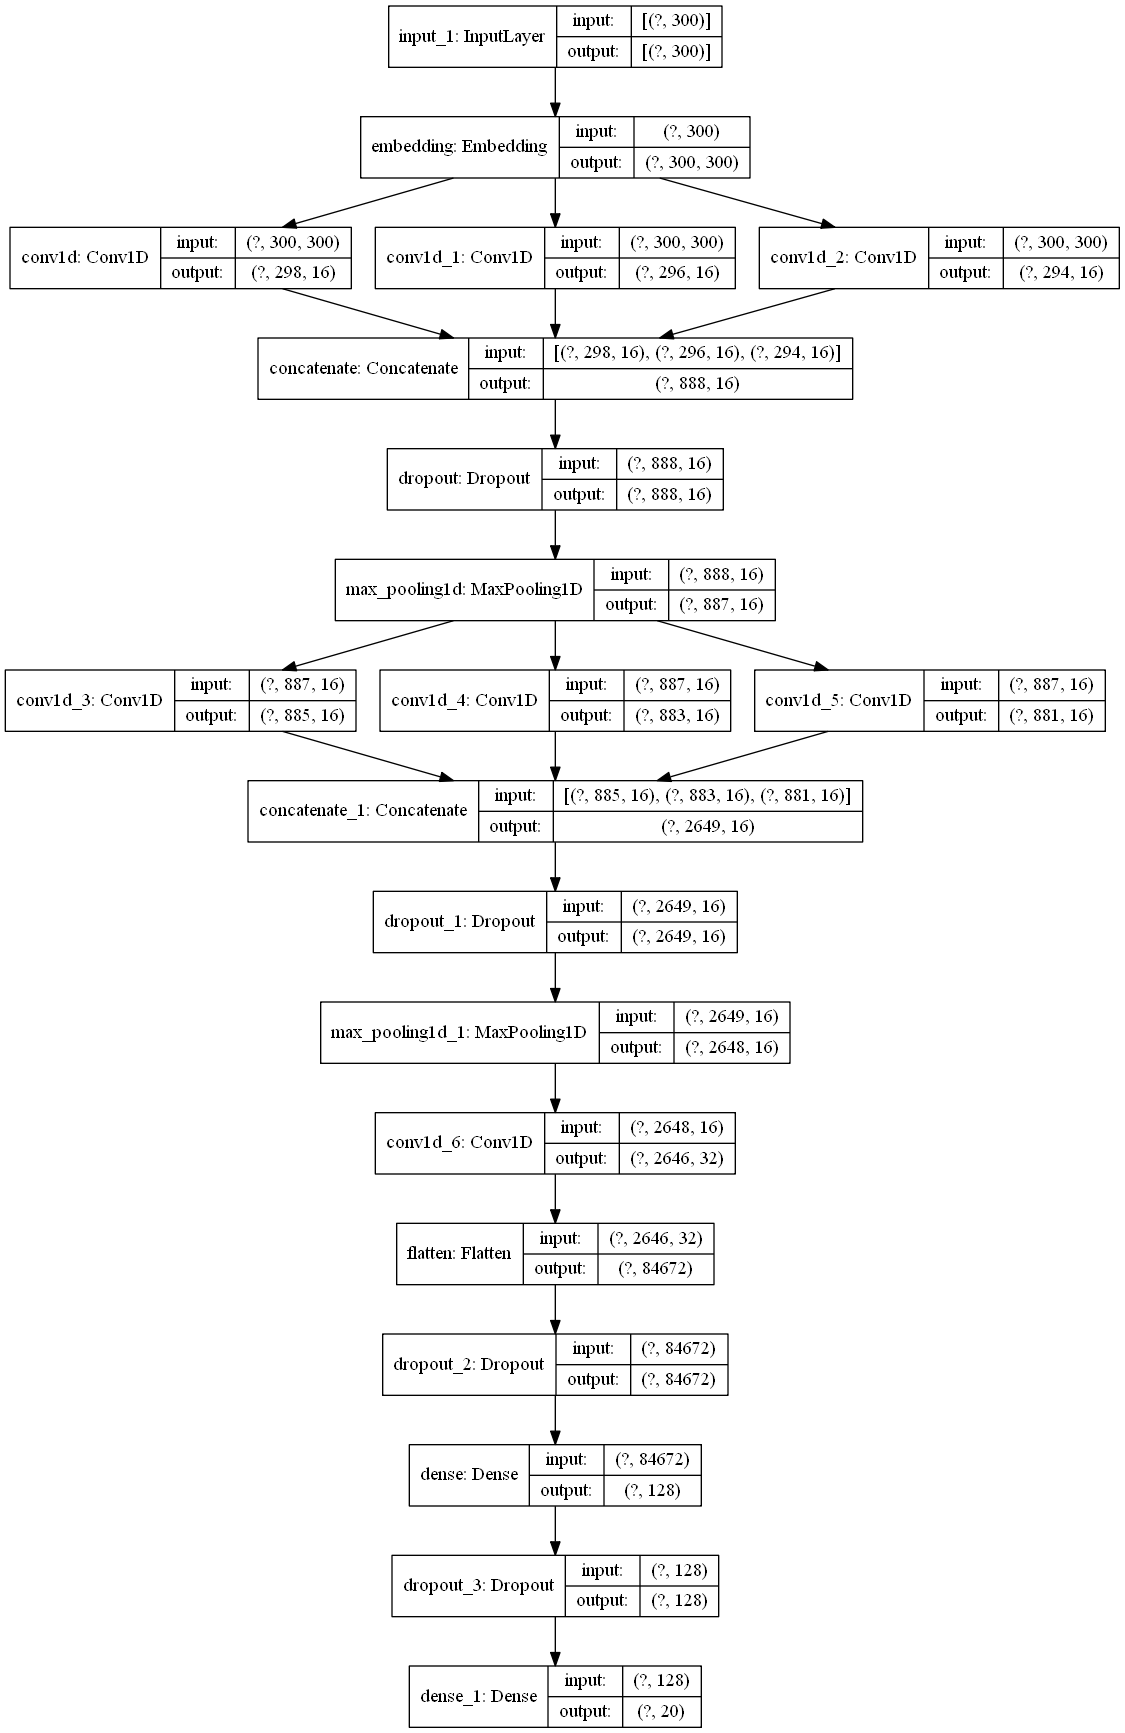

In [22]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [23]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs\20201215-182355


In [24]:
#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import EarlyStopping
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
filepath="best_model_1.h5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_calc_f1_score', verbose=1, save_best_only=True, mode='max')
es_checkpoint = EarlyStopping(monitor='val_calc_f1_score', mode='max', verbose=1,patience=5)
callbacks_list = [checkpoint_callback,tensorboard_callback,es_checkpoint]

In [25]:
model.fit(padded_text_train, y_train,epochs=50,verbose=1,batch_size=128,
        validation_data=(padded_text_test,y_test),callbacks =callbacks_list)

Epoch 1/50
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
111/111 [==============================] - ETA: 0s - loss: 2.9896 - calc_f1_score: 0.0626
Epoch 00001: val_calc_f1_score improved from -inf to 0.10360, saving model to best_model_1.h5
111/111 [==============================] - 72s 646ms/step - loss: 2.9896 - calc_f1_score: 0.0626 - val_loss: 2.9900 - val_calc_f1_sc

Epoch 23/50
111/111 [==============================] - ETA: 0s - loss: 0.2647 - calc_f1_score: 0.9094
Epoch 00023: val_calc_f1_score improved from 0.83045 to 0.83643, saving model to best_model_1.h5
111/111 [==============================] - 72s 650ms/step - loss: 0.2647 - calc_f1_score: 0.9094 - val_loss: 0.6235 - val_calc_f1_score: 0.8364
Epoch 24/50
111/111 [==============================] - ETA: 0s - loss: 0.2301 - calc_f1_score: 0.9202
Epoch 00024: val_calc_f1_score improved from 0.83643 to 0.83862, saving model to best_model_1.h5
111/111 [==============================] - 85s 765ms/step - loss: 0.2301 - calc_f1_score: 0.9202 - val_loss: 0.6049 - val_calc_f1_score: 0.8386
Epoch 25/50
111/111 [==============================] - ETA: 0s - loss: 0.1970 - calc_f1_score: 0.9323
Epoch 00025: val_calc_f1_score did not improve from 0.83862
111/111 [==============================] - 75s 678ms/step - loss: 0.1970 - calc_f1_score: 0.9323 - val_loss: 0.6040 - val_calc_f1_score: 0.8336
Epoch 26

#### Model Loss vs F1 Score
<img src="Epoch_loss_f1_score_model1.jpg">

###### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

In [20]:
### character level embedding

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
## fitting on text
tokenizer.fit_on_texts(X_train.tolist())

In [22]:
text_seq_train = tokenizer.texts_to_sequences(X_train)
text_seq_test = tokenizer.texts_to_sequences(X_test)

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_text_train = pad_sequences(text_seq_train,maxlen=500,padding='post', truncating='post')
padded_text_test = pad_sequences(text_seq_test, maxlen=500,padding='post', truncating='post')

In [25]:
len(text_seq_train[0])

580

<img src='https://i.imgur.com/EuuoJtr.png'>

In [27]:
# define the model
inputs = Input(shape=(500,))
embedding1 = Embedding(vocab_size, 500)(inputs)
x = Conv1D(filters=16, kernel_size=3, activation='relu')(embedding1)
x = Conv1D(filters=16, kernel_size=5, activation='relu')(x)
## pooling
pool1 = Dropout(0.5)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=16, kernel_size=3, activation='relu')(x)
x = Conv1D(filters=16, kernel_size=5, activation='relu')(x)
## pooling
x = Dropout(0.5)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='sigmoid')(x)
model1 = Model(inputs=inputs, outputs=outputs)
# compile
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[calc_f1_score])
# summarize
print(model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 500)          50332500  
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 16)           24016     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 16)           1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 247, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 245, 16)           784       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 241, 16)           1296  

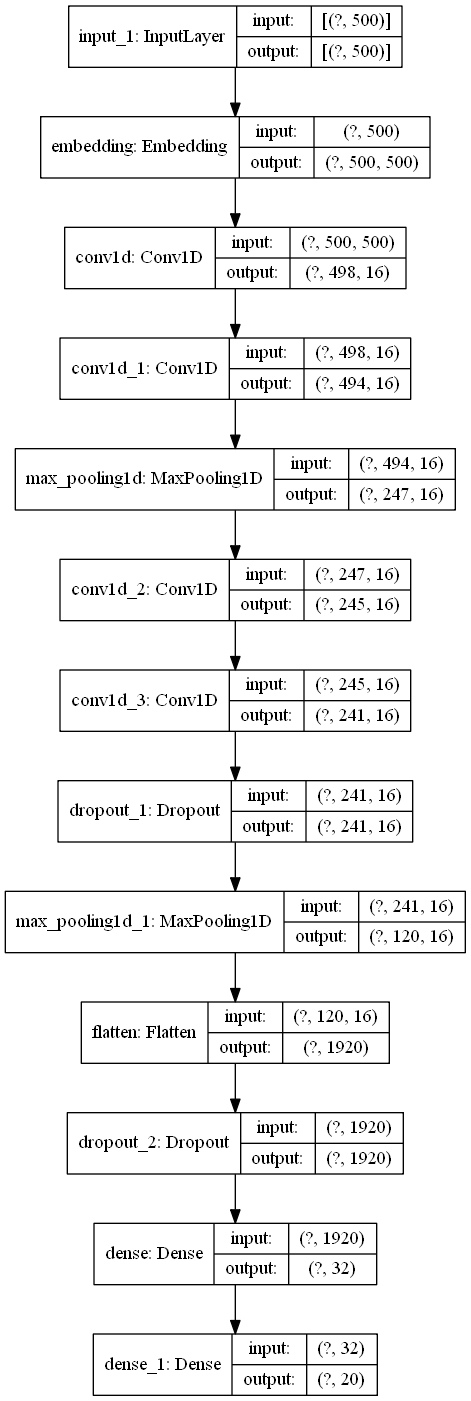

In [28]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model1, 'model1.png', show_shapes=True)

In [29]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs\20201217-194223


In [30]:
#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import EarlyStopping
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
filepath="best_model_2.h5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_calc_f1_score', verbose=1, save_best_only=True, mode='max')
es_checkpoint = EarlyStopping(monitor='val_calc_f1_score', mode='max', verbose=1,patience=10)
callbacks_list = [checkpoint_callback,tensorboard_callback,es_checkpoint]

In [31]:
model1.fit(padded_text_train, y_train,epochs=50,verbose=1,batch_size=256,
        validation_data=(padded_text_test,y_test),callbacks =callbacks_list)

Epoch 1/50
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
56/56 [==============================] - ETA: 0s - loss: 2.9840 - calc_f1_score: 0.0655
Epoch 00001: val_calc_f1_score improved from -inf to 0.07252, saving model to best_model_2.h5
56/56 [==============================] - 71s 1s/step - loss: 2.9840 - calc_f1_score: 0.0655 - val_loss: 2.9653 - val_calc_f1_score: 0.

56/56 [==============================] - 44s 793ms/step - loss: 2.3086 - calc_f1_score: 0.2089 - val_loss: 2.3821 - val_calc_f1_score: 0.1992
Epoch 24/50
56/56 [==============================] - ETA: 0s - loss: 2.2900 - calc_f1_score: 0.2146
Epoch 00024: val_calc_f1_score improved from 0.21076 to 0.21128, saving model to best_model_2.h5
56/56 [==============================] - 47s 834ms/step - loss: 2.2900 - calc_f1_score: 0.2146 - val_loss: 2.3147 - val_calc_f1_score: 0.2113
Epoch 25/50
56/56 [==============================] - ETA: 0s - loss: 2.2553 - calc_f1_score: 0.2206
Epoch 00025: val_calc_f1_score did not improve from 0.21128
56/56 [==============================] - 46s 826ms/step - loss: 2.2553 - calc_f1_score: 0.2206 - val_loss: 2.3192 - val_calc_f1_score: 0.2045
Epoch 26/50
56/56 [==============================] - ETA: 0s - loss: 2.2660 - calc_f1_score: 0.2141
Epoch 00026: val_calc_f1_score did not improve from 0.21128
56/56 [==============================] - 46s 828ms/step -

#### Overfitting
<img src="Epoch_loss_f1_score_model2.jpg">